In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("E-Commerce Data.csv", encoding="ISO-8859-1")
df.shape

(541909, 8)

In [4]:
df.head()
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [8]:
print(df[df["InvoiceNo"].astype(str).str.startswith("C")])

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     1

In [9]:
df_sales_0 = df[df["Quantity"] > 0].copy()

In [10]:
df_sales_0.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
df_sales_0["Revenue"] = df_sales_0["Quantity"] * df_sales_0["UnitPrice"]

In [12]:
df_sales_0[["Quantity", "UnitPrice", "Revenue"]].head()

,Quantity,UnitPrice,Revenue
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


In [13]:
df_sales_0["YearMonth"] = df_sales_0["InvoiceDate"].dt.to_period("M")

In [14]:
monthly_revenue = (
    df_sales_0
    .groupby("YearMonth")["Revenue"]
    .sum()
    .reset_index()
)
monthly_revenue.head()

,YearMonth,Revenue
0,2010-12,823746.140
1,2011-01,691364.560
2,2011-02,523631.890
3,2011-03,717639.360
4,2011-04,537808.621


In [15]:
country_revenue = (df_sales_0.groupby("Country")["Revenue"] .sum() .reset_index() .sort_values(by="Revenue", ascending=False) )

In [16]:
country_revenue.head()

,Country,Revenue
36,United Kingdom,9003097.964
24,Netherlands,285446.340
10,EIRE,283453.960
14,Germany,228867.140
13,France,209715.110


In [17]:
product_revenue = (
    df_sales_0.groupby(["StockCode", "Description"])["Revenue"]
    .sum()
    .reset_index()
    .sort_values(by="Revenue", ascending=False)
)

In [18]:
product_revenue.head(10)

,StockCode,Description,Revenue
4307,DOT,DOTCOM POSTAGE,206248.77
1400,22423,REGENCY CAKESTAND 3 TIER,174484.74
2772,23843,"PAPER CRAFT , LITTLE BIRDIE",168469.60
3791,85123A,WHITE HANGING HEART T-LIGHT HOLDER,104340.29
2994,47566,PARTY BUNTING,99504.33
3768,85099B,JUMBO BAG RED RETROSPOT,94340.05
2216,23166,MEDIUM CERAMIC TOP STORAGE JAR,81700.92
4308,M,Manual,78110.27
4310,POST,POSTAGE,78101.88
2113,23084,RABBIT NIGHT LIGHT,66964.99


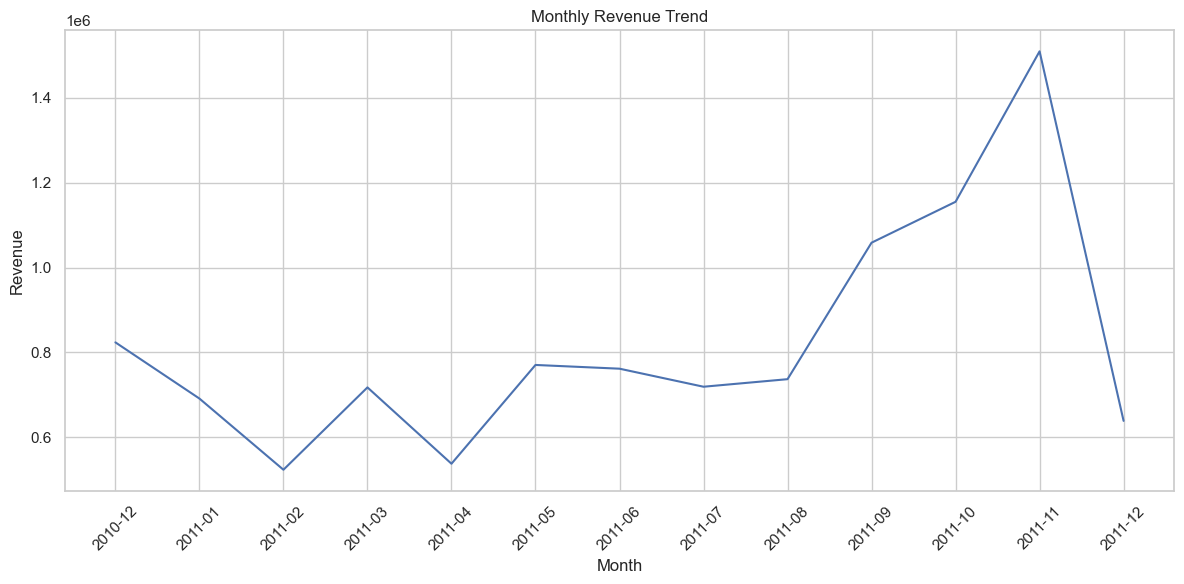

In [19]:
plt.figure(figsize=(12, 6))

plt.plot(
    monthly_revenue["YearMonth"].astype(str),  
    monthly_revenue["Revenue"]                  
)

plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

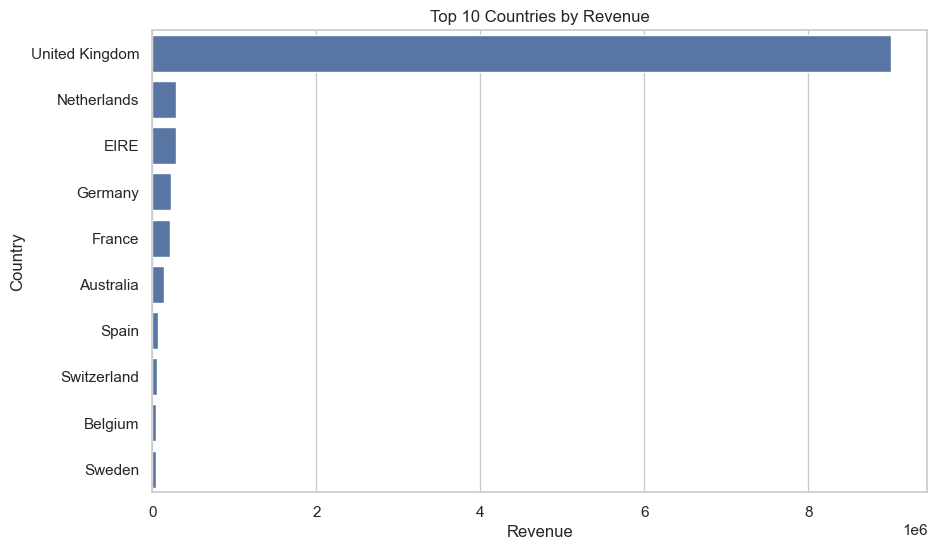

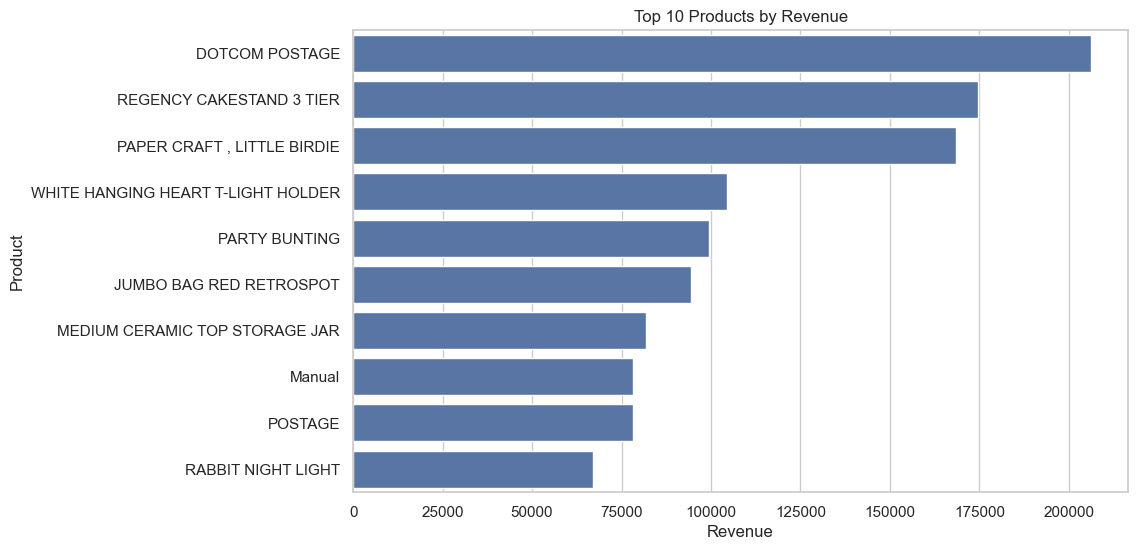

In [20]:
top10_country = country_revenue.head(10)
plt.figure(figsize=(10, 6))

sns.barplot(
    data=top10_country,
    x="Revenue",
    y="Country"
)

plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Country")

plt.show()
top10_product = product_revenue.head(10)
plt.figure(figsize=(10, 6))

sns.barplot(
    data=top10_product,
    x="Revenue",
    y="Description"
)

plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")

plt.show()

In [22]:
df_sales_0.to_csv("ecommerce_clean.csv", index=False)